In [6]:
from matplotlib import pyplot as plt
import numpy as np
import random
import csv
from skimage import exposure
import cv2

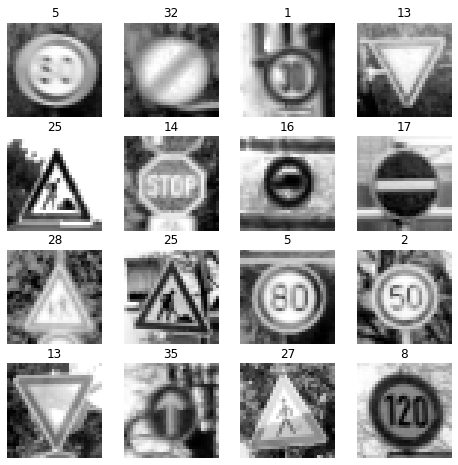

In [8]:
path = './Dataset/'

img_infos = {'labels':[],'images':[]}

with open(path +"Test.csv","r") as csv_file:
    reader = csv.reader(csv_file, delimiter=',', quotechar='|')
    next(reader)

    for row in reader:

        img = cv2.imread(path+row[-1], cv2.IMREAD_UNCHANGED) 
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        cv2.normalize(img, img, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        
        img = exposure.equalize_hist(img)

        img = cv2.resize(img, (32,32) ,interpolation = cv2.INTER_AREA) #Resize the image to 32x32
        
        img = np.array(img)

        img_infos['images'].append(img) #Save Image pixels
        img_infos['labels'].append(row[-2]) #Save image Label
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 4
ax=[]

for i in range(columns*rows):
    rand_index = random.randint(0, len(img_infos['images']) -1)
    
    img = img_infos['images'][rand_index]
    label = img_infos['labels'][rand_index]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(label)  # set title
    plt.imshow(img, cmap='gray')

    plt.axis("off")
plt.show()